# Experimentación métodos iterativos

In [2]:
import numpy as np
import subprocess as sp
import matplotlib.pyplot as plt
import json
import os

dir_datos = "../data/sistemas"
dir_resultados = "../data/resultados"
dir_tiempos = "../data/tiempos"
dir_figuras = "../data/figuras"

if not os.path.exists(dir_resultados):
    os.makedirs(dir_resultados)

if not os.path.exists(dir_datos):
    os.makedirs(dir_datos)

if not os.path.exists(dir_tiempos):
    os.makedirs(dir_tiempos)

if not os.path.exists(dir_figuras):
    os.makedirs(dir_figuras)

## Funciones auxiliares

In [3]:
metodos = ["LU", "J", "JS", "GS", "GSS"]
nombre = ["Factorización LU", "Jacobi", "Jacobi Sum", "Gauss-Seidel", "Gauss-Seidel Sum"]
algoritmos = dict(zip(metodos, nombre))

In [5]:
def correr_algoritmo(tam, metodo, iteraciones=0, tol=0):
    proceso = sp.run(["../src/iterativo", os.path.join(dir_datos, f"sistema_{tam}.txt"), metodo, str(iteraciones), str(tol)], capture_output=True, text=True)
    proceso.check_returncode()

    return np.array(proceso.stdout.split(" "), dtype=np.float64)

def cargar_solucion(tam):    
    return np.genfromtxt(os.path.join(dir_datos, f"x_{tam}.txt"))

def guardar_errores_metodos(resultados, nombre, tam):
    np.savetxt(os.path.join(dir_resultados, f"{nombre}_{tam}.txt"), resultados, delimiter=" ")

def cargar_errores_metodos(nombre, tam):
    return np.genfromtxt(os.path.join(dir_resultados, f"{nombre}_{tam}.txt"))
    
def obtener_tiempos(metodo):
    tiempos = np.array([])
    for i in range(2, n + 1):
        t = %timeit -o correr_algoritmo(2 ** i, metodo, max_iter, tolerancia)
        tiempos = np.append(tiempos, t.average)
    
    return tiempos

def guardar_tiempos_metodos(tiempos, nombre):
    np.savetxt(os.path.join(dir_tiempos, f"{nombre}_tiempos.txt"), tiempos, delimiter=" ")

def cargar_tiempos_metodos(nombre):
    return np.genfromtxt(os.path.join(dir_tiempos, f"{nombre}_tiempos.txt"))

def graficar_error_metodos(errores, metodo, muestras=None, log=False):
    plt.title(f"Error para el método {algoritmos[metodo]}{' (log)' if log else ''}")
    plt.ylabel("Error")
    if metodo != "LU":
        for i in range(2, n + 1):
            tam = 2 ** i
            errores_metodo = errores[metodo][i - 2]
            print(errores_metodo)

            ax = plt.subplot()
            ax.plot(iters[:muestras], errores_metodo[:muestras], "-", label=f"n = {tam}")
            ax.legend()
        
        plt.xlabel("Iteraciones")
        if log:
            plt.yscale("log")
    else:
        plt.plot([2 ** i for i in range(2, n + 1)], errores[metodo], "-")
        plt.xlabel("Tamaño matriz")
        
    plt.savefig(os.path.join(dir_figuras, f"error_{algoritmos[metodo]}{'_' + str(muestras) if muestras else ''}{'_log' if log else ''}.png"))
    plt.show()

def graficar_tiempos_metodos(tiempos, metodo):
    times = []
    stdev = []

    for tiempo in tiempos[metodo]:
        times.append(tiempo[0])
        stdev.append(tiempo[1])

    plt.plot([2 ** i for i in range(2, n + 1)], times, "o-", label=algoritmos[metodo])
    plt.xlabel("Tamaño matriz")
    plt.ylabel("Tiempo (s)")
    plt.legend()
    plt.title(f"Tiempo de ejecución en relación tamaño matriz")
    #plt.show()

## Experimentación

In [6]:
n = 512
max_iter = 2000
tolerancia = 1e-10

x = cargar_solucion(n)
iters = range(1, max_iter)

### Jacobi

In [7]:
errores_jacobi = np.array([])
for iter in iters:
    res = correr_algoritmo(n, "J", iter, tolerancia)
    errores_jacobi = np.append(errores_jacobi, np.linalg.norm(x - res))

guardar_errores_metodos(errores_jacobi, "jacobi", n)

### Gauss-Seidel

In [8]:
errores_gauss_seidel = np.array([])
for iter in iters:
    res = correr_algoritmo(n, "GS", iter, tolerancia)
    errores_gauss_seidel = np.append(errores_gauss_seidel, np.linalg.norm(x - res))

guardar_errores_metodos(errores_gauss_seidel, "gauss-seidel", n)

## Gráficos

### Error

In [9]:
errores_gauss_seidel = cargar_errores_metodos("gauss-seidel", n)
errores_jacobi = cargar_errores_metodos("jacobi", n)

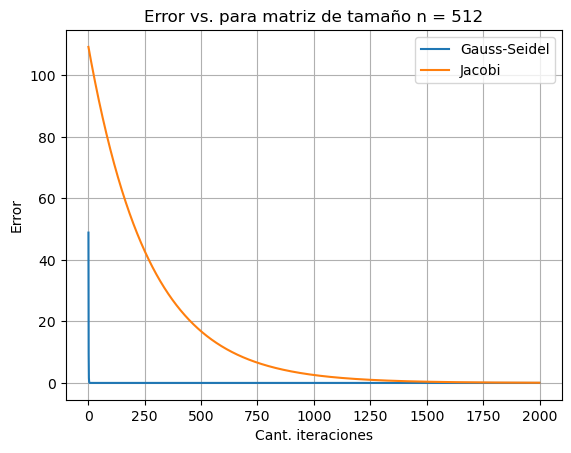

In [10]:
plt.plot(iters, errores_gauss_seidel, "-", label="Gauss-Seidel")
plt.plot(iters, errores_jacobi, "-", label="Jacobi")
plt.xlabel("Cant. iteraciones")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title(f"Error vs. para matriz de tamaño n = {n}")
plt.savefig(os.path.join(dir_figuras, f"error_vs_{n}.jpg"))

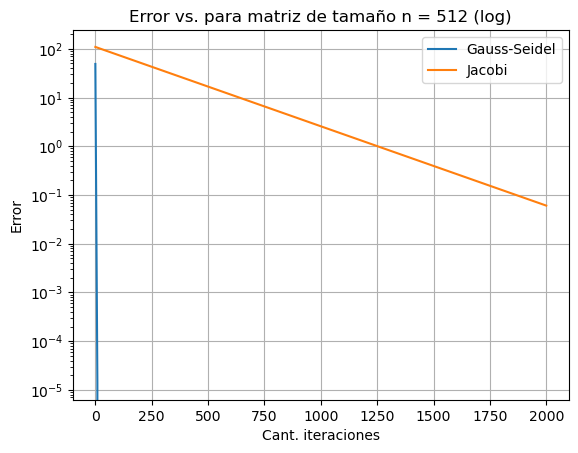

In [13]:
plt.plot(iters, errores_gauss_seidel, "-", label="Gauss-Seidel")
plt.plot(iters, errores_jacobi, "-", label="Jacobi")
plt.xlabel("Cant. iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title(f"Error vs. para matriz de tamaño n = {n} (log)")
plt.savefig(os.path.join(dir_figuras, f"error_vs_{n}_log.jpg"))

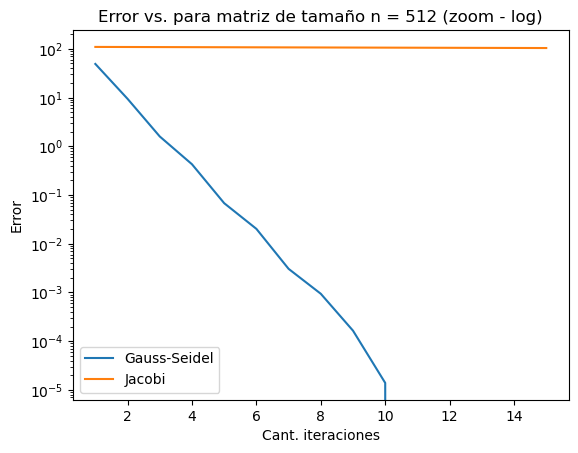

In [12]:
plt.plot(iters[:15], errores_gauss_seidel[:15], "-", label="Gauss-Seidel")
plt.plot(iters[:15], errores_jacobi[:15], "-", label="Jacobi")
plt.xlabel("Cant. iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.legend()
plt.title(f"Error vs. para matriz de tamaño n = {n} (zoom - log)")
plt.savefig(os.path.join(dir_figuras, f"error_vs_{n}_zoom_log.jpg"))

### Tiempo de cómputo